<a href="https://colab.research.google.com/github/alibouch/TensorFlow_FSA_21-22/blob/main/Atelier_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atelier 6 : les CNN

In [ ]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

# La convolution

**Le code suivant charge deux images en couleur (l’une d’un temple chinois, l’autre d’une fleur) à l’aide de la fonction `load_sample_images()` de Scikit-Learn. Pour chaque canal de couleur, l’intensité d’un pixel est représentée par un nombre dont la valeur est entre 0 et 255. Nous redimensionnons ces caractéristiques en les divisant par 255, pour obtenir des nombres réels entre 0 et 1.** 

In [ ]:
import numpy as np
from sklearn.datasets import load_sample_image

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

**1. Créez 2 filtres de 7×7 Par canal de couleur (l’un avec une ligne blanche verticale centrale, l’autre avec une ligne blanche horizontale centrale).**

In [ ]:
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[          ] = 1  # ligne verticale blanche
filters[          ] = 1  # ligne horizontale blanche

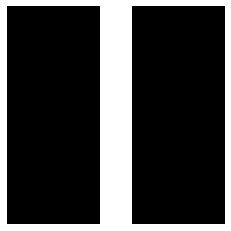

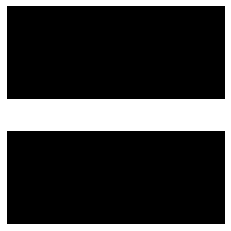

In [ ]:
plot_image(filters[:, :, 0, 0])
plt.show()
plot_image(filters[:, :, 0, 1])
plt.show()

**2. Appliquez ces filtres aux deux images avec la fonction `tf.nn.conv2d()`, qui fait partie de l’API de bas niveau pour le Deep Learning de TensorFlow. Nous utilisons une marge de zéros (zero padding) et un pas (stride) de 1 :**

In [ ]:
outputs = 

**Affichage de la 2ème feature map de la 1ère image :**

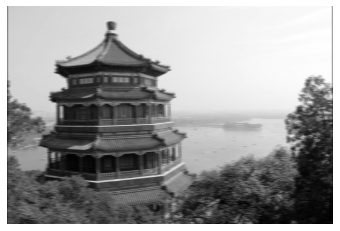

In [ ]:
plt.imshow(outputs[0, :, :, 1], cmap="gray") 
plt.axis("off") 
plt.show()

**Affichage des feature maps de la 1ère la 2ème image :**

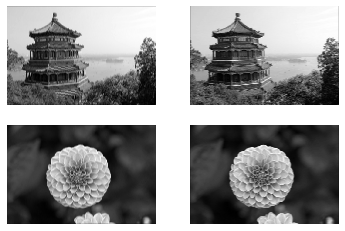

In [ ]:
for image_index in (0, 1):
    for feature_map_index in (0, 1):
        plt.subplot(2, 2, image_index * 2 + feature_map_index + 1)
        plot_image(outputs[image_index, :, :, feature_map_index])

plt.show()

In [ ]:
def crop(images):
    return images[150:220, 130:250]

Saving figure china_original


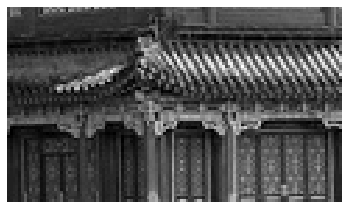

Saving figure china_vertical


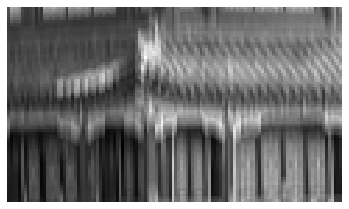

Saving figure china_horizontal


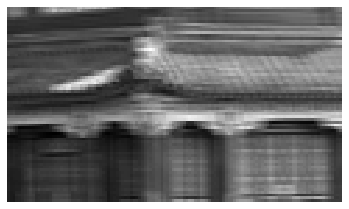

In [ ]:
plot_image(crop(images[0, :, :, 0]))
save_fig("china_original", tight_layout=False)
plt.show()

for feature_map_index, filename in enumerate(["china_vertical", "china_horizontal"]):
    plot_image(crop(outputs[0, :, :, feature_map_index]))
    save_fig(filename, tight_layout=False)
    plt.show()

## La couche de convolution

**Dans l'exemple précédent, nous avons créé les filtres manuellement, mais dans un vrai CNN ils seraient définis comme des variables entraînables afin que le réseau de neurones apprenne ceux qui conviennent. Au lieu de créer les variables manuellement, nous pouvons utiliser la couche `keras.layers.Conv2D`.**

**1. Créez une couche `Conv2D` constituée de 32 filtres, chacun de taille 7×7, avec une marge de zéros (zero padding) et un pas (stride) de 1. Appliquez la fonction d’activation `ReLU` à ses sorties :**

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

conv = 


**Appelons cette couche et appliquons-là aux deux images de test :**

In [ ]:
conv_outputs = conv(images)
conv_outputs.shape 

TensorShape([2, 427, 640, 2])

**La sortie est un tenseur 4D. Les dimensions sont : taille du lot(batch size), hauteur, largeur et canaux. La première dimension (taille du lot) est 2 puisqu'il y a 2 images d'entrée. Les deux dimensions suivantes sont la hauteur et la largeur des feature maps de la sortie. Cette couche de convolution possède 2 filtres, la dernière dimension est donc 2 : il y a 2 feature maps en sortie par image en entrée. **

# La couche de pooling

**Les couches de pooling ont pour objectif de sous-échantillonner (c’est-à-dire rétrécir) l’image d’entrée afin de réduire la charge de calcul, l’utilisation de la mémoire et le nombre de paramètres (limitant ainsi le risque de l'overfitting).**

## Couche de pooling maximum (Max pooling)

**1. Créez une couche de pooling maximum avec un noyau 2×2 :**

In [ ]:
max_pool = 

In [ ]:
cropped_images = np.array([crop(image) for image in images], dtype=np.float32)
output = max_pool(cropped_images)

Saving figure china_max_pooling


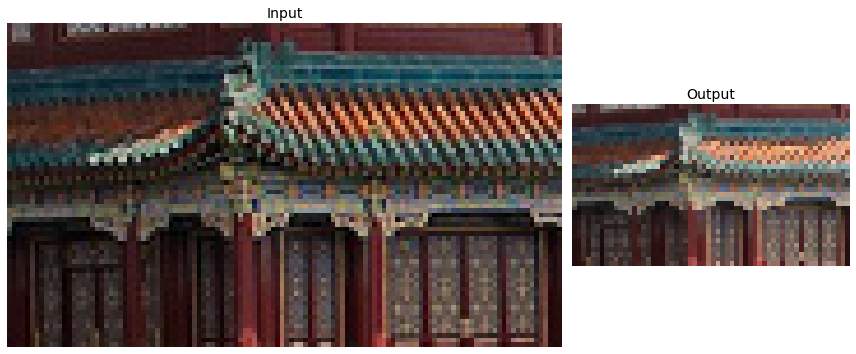

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
save_fig("china_max_pooling")
plt.show()

## Couche de pooling moyen (average pooling)

**2. Créez une couche de pooling moyen avec un noyau 2×2 :**

In [ ]:
avg_pool = 

In [ ]:
output_avg = avg_pool(cropped_images)

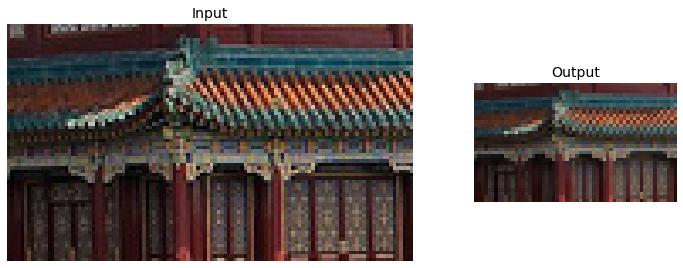

In [ ]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input", fontsize=14)
ax1.imshow(cropped_images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output", fontsize=14)
ax2.imshow(output_avg[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

## Couche de pooling moyen global (Global Average Pooling)

 **La couche de pooling moyen global calcule la moyenne sur l’intégralité de chaque feature map (cela équivaut à une couche de pooling moyen qui utilise un noyau de pooling ayant les mêmes dimensions spatiales que les entrées). Autrement dit, elle produit simplement une seule valeur par feature map et par instance. Bien que cette approche soit extrêmement destructrice (la majorité des
informations présentes dans la carte de caractéristiques est perdue), elle peut se révéler utile en tant que couche de sortie.**

**3. Créez une couche de pooling moyen global :**

In [ ]:
global_avg_pool = 
global_avg_pool(cropped_images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.2788777 , 0.22507192, 0.20967275],
       [0.51288515, 0.45951638, 0.33423486]], dtype=float32)>

# CNN pour traiter le jeu de données `Fashion MNIST`

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

En vous basant sur la couche `DefaultConv2D` créez un CNN avec les caractéristiques suivantes :
* une première couche utilise 64 filtres de 7×7.
* une couche de pooling maximum, qui utilise un pool de taille 2.
* deux couches de convolution utilisant 128 filtres de 3×3 suivies d’une couche de pooling maximum qui utilise un pool de taille 2.
* deux couches de convolution utilisant 256 filtres de 3×3 suivies d’une couche de pooling maximum qui utilise un pool de taille 2.
* un réseau intégralement connecté, constitué de deux couches cachées denses respectivement de 128 et 64 neurones (avec La fonction d’activation ReLU)  et d’une couche de sortie dense de 10 neurones (avec La fonction d’activation softmax). Vous devez tout d'abord aplatir les entrées et  pour réduire l'overfitting, ajoutez également deux couches de dropout, chacune avec un taux d’extinction de 50 % après chacunes des deux premières couches denses.

In [ ]:
model = keras.models.Sequential([
    DefaultConv2D(                                         ),
                                                         ,
                                                     ,
                                                     ,
                                                     ,
                                                     ,
                                                     ,
                                                     ,
                                                     ,
                                                    ,
                                                    ,
                                                    ,
                                                    ,
                                                     ,
])

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

313/313 [==============================] - 3s 9ms/step - loss: 0.4399 - accuracy: 0.8503


## Implémenter un CNN RESNET-34

**1. Créez le bloc résiduel suivant :**

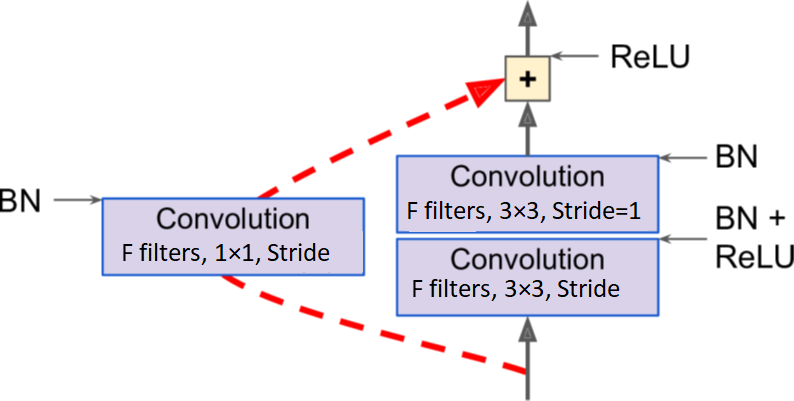

In [ ]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(          ,                 ),
                                          ,
                                    ,
                                      ,
                                           ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                                                                     ,
                                                      ]

    def call(self, inputs):
        Z = 
        for layer in self.main_layers:
            Z = 
        skip_Z = 
        for layer in self.skip_layers:
            skip_Z = 
        return 

**2. Créez le modèle résiduel suivant en vous basant la couche `ResidualUnit`. Les images d'entrée sont des images couleurs de taille 224×224 :**

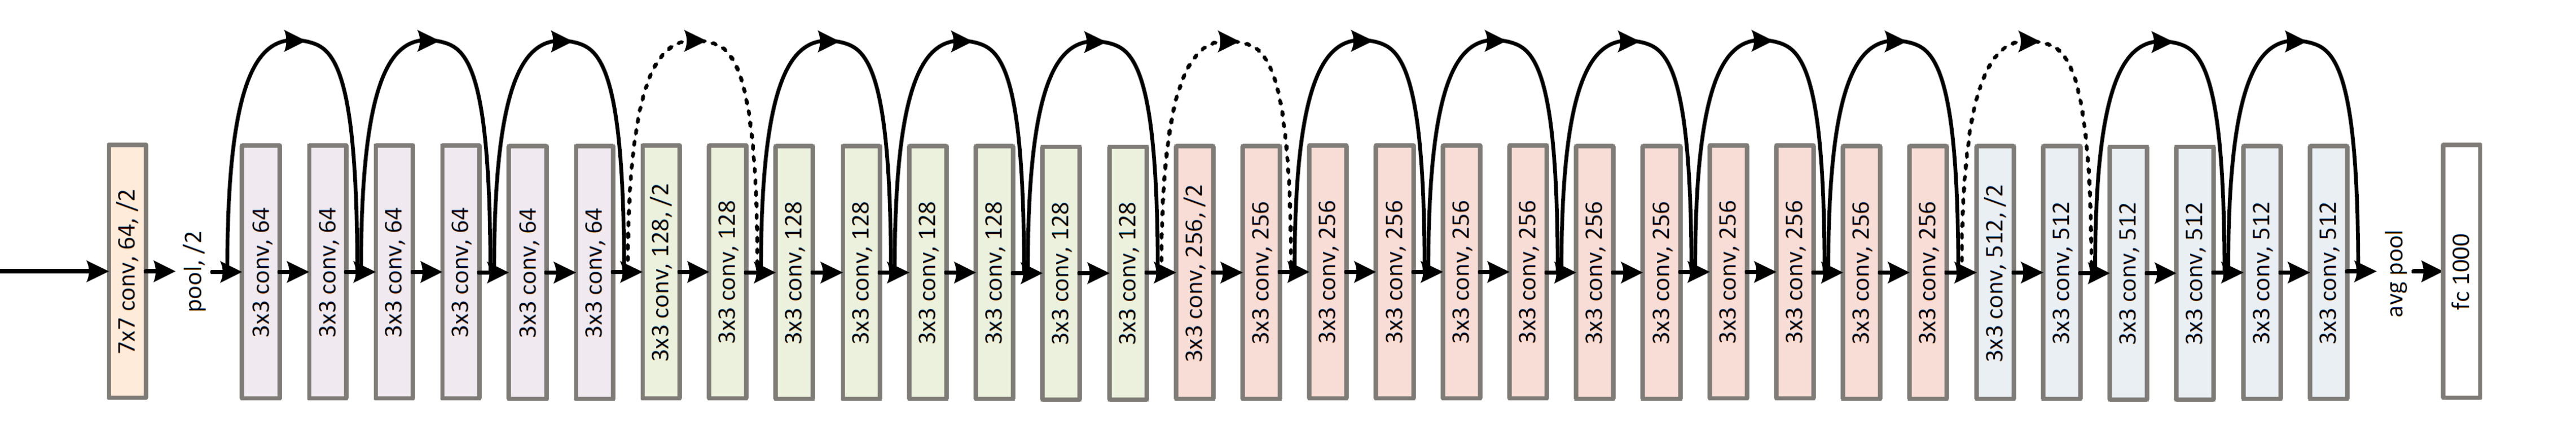

In [ ]:
model = keras.models.Sequential()
model.add(DefaultConv2D(
                                                    )
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in                                                :
    strides = 1 if                          else 2
    model.add(                                    )
    prev_filters = 
model.add(                                        )
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 112, 112, 64)      9408      
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 112, 112, 64)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 residual_unit (ResidualUnit  (None, 56, 56, 64)       74240     
 )                                                               
                                                      

## Utiliser des modèles préentraînés

**En général, vous n’aurez pas à implémenter manuellement des modèles standard
comme `GoogLeNet` ou `ResNet`, car des réseaux préentraînés sont disponibles dans le package` keras.applications`.**

**1. En utilisant ce package, chargez le modèle ResNet-50, préentraîné sur ImageNet :**

In [ ]:
model = 

102981632/102967424 [==============================] - 1s 0us/step


Pour exploiter ce modèle, vous devez commencer par vérifier que les images ont la taille appropriée. Puisqu’un modèle ResNet-50 attend des images de 224×224 pixels. Utilisez la fonction `tf.image.resize()` de TensorFlow pour redimensionner les images china et flower chargées précédemment (`images`) :

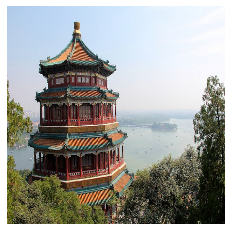

In [ ]:
images_resized = tf.image.resize(images, [224, 224])
plot_color_image(images_resized[0])
plt.show()

**2. Les modèles préentraînés supposent que les images sont prétraitées de manièrespécifique. Dans certains cas, ils peuvent attendre que les entrées soient redimensionnées entre 0 et 1, ou entre –1 et 1, etc. Chaque modèle fournit une fonction` preprocess_input()` qui vous permet de prétraiter vos images. Puisque ces fonctions supposent que les valeurs de pixels se trouvent dans la plage 0 à 255, nous devons les multiplier par 255 (puisqu’elles ont été précédemment redimensionnées dans la plage 0 à 1) :**

In [ ]:
inputs =
Y_proba = model.predict(inputs)

In [ ]:
Y_proba.shape

(2, 1000)

**La sortie `Y_proba` est une matrice constituée d’une ligne par image et d’une
colonne par classe (dans ce cas, nous avons 1 000 classes). Pour afficher les K premières prédictions, accompagnées du nom de la classe et de la probabilité estimée pour chaque classe prédite, utilisez la fonction `decode_predictions()`. Pour chaque image, elle retourne un tableau contenant les K premières prédictions, où chaque prédiction est représentée sous forme d’un tableau qui contient l’identifiant de la classe, son nom et le score de confiance correspondant :**

**3. Utilisez cette fonction pour afficher les 3 premières prédictions, pour chacune des deux images, en affichant pour chaque prédictions l'identifiant de la classe, le nom et le score de confiance (confidence score) :**

In [ ]:
top_K = 
for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(        ,      ,           ))
    print()

49152/35363 [=========================================] - 0s 0us/step
Image #0
  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%

Image #1
  n03530642 - honeycomb    49.83%
  n13040303 - stinkhorn    33.96%
  n02206856 - bee          4.35%



## Les modèles préentraînés pour un transfert d'apprentissage (Transfer Learning)

**Si vous souhaitez construire un classificateur d’images sans disposer de données d’entraînement suffisantes, il est souvent préférable de réutiliser les couches basses d’un modèle préentraîné. Par exemple, entraînons un modèle de classification d’images de fleurs, en réutilisant un modèle `Xception` préentraîné. Commençons par charger le jeu de données à l’aide d’un dataset TensorFlow :**

In [ ]:
import tensorflow_datasets as tfds

dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]


Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [ ]:
info.splits

{'train': <tfds.core.SplitInfo num_examples=3670>}

In [ ]:
info.splits["train"]

<tfds.core.SplitInfo num_examples=3670>

In [ ]:
class_names = info.features["label"].names
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [ ]:
n_classes = info.features["label"].num_classes

In [ ]:
dataset_size = info.splits["train"].num_examples
dataset_size

3670

**Dansce jeu de données, il n’existe qu’un dataset `train`, sans jeu de test ni de validation. Nous devons donc découper le dataset `train`. Pour cela, nous utilisons la [split API](https://www.tensorflow.org/datasets/splits) de TFDS.**

**1. Découpez le dataset `tf_flowers`en prennant les premiers 10 % du jeu de données pour les tests, les 15 % suivants pour la validation et les 75 % restants pour l’entraînement :**

In [ ]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=[               ,             ,              ],
    as_supervised=True)

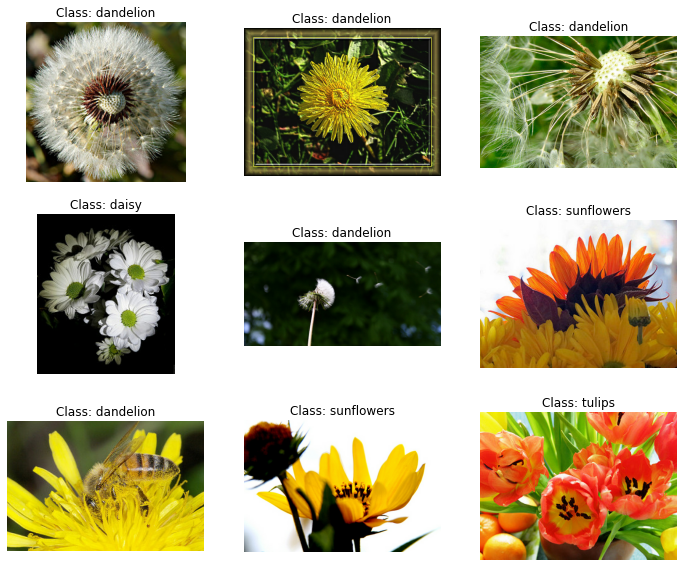

In [ ]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in train_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title("Class: {}".format(class_names[label]))
    plt.axis("off")

plt.show()

Basic preprocessing:

**2. Ensuite, nous devons prétraiter les images. Puisque ce CNN attend des images de 224×224 pixels, Nous devons les redimensionner. Nous devons également les passer à la fonction `preprocess_input()` du CNN `Xception` :**

In [ ]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = 
    return final_image, label

**Appliquons cette fonction de prétraitement aux trois datasets, mélangeons le jeu d’entraînement et ajoutons la mise en lots et la prélecture aux trois datasets :**

In [ ]:
batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

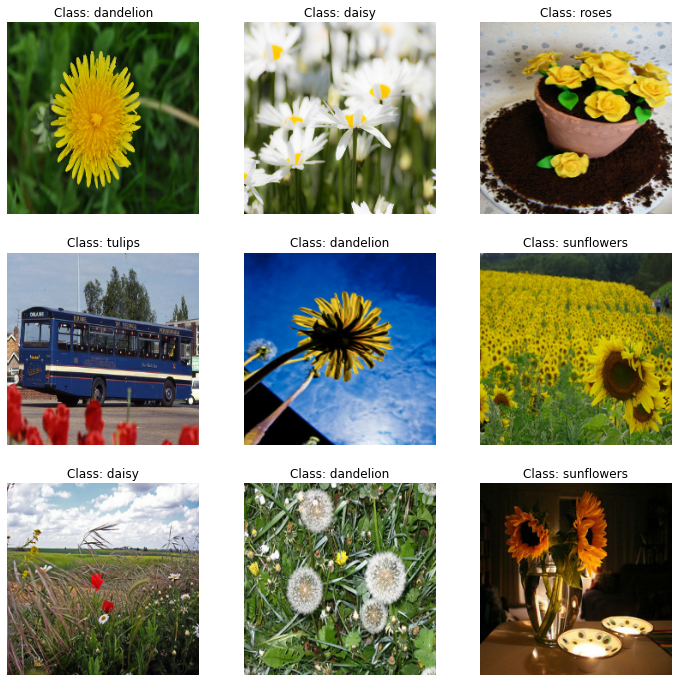

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in train_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

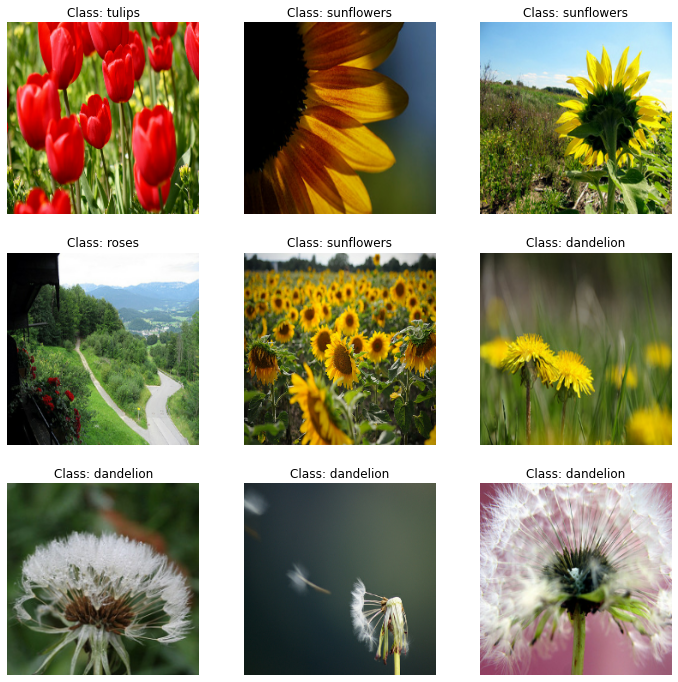

In [ ]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in test_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(X_batch[index] / 2 + 0.5)
        plt.title("Class: {}".format(class_names[y_batch[index]]))
        plt.axis("off")

plt.show()

**3. Chargez un modèle *Xception*, préentraîné sur *ImageNet* en excluant la partie supérieure du réseau en indiquant `include_top=False` (c’està-dire la couche de pooling moyen global et la couche de sortie dense) :**

In [ ]:
base_model =


83697664/83683744 [==============================] - 1s 0us/step


**4. Ajoutez ensuite votre propre couche de pooling moyen global, fondée sur la sortie du modèle de base, suivie d’une couche de sortie dense avec une unité par classe et la fonction d’activation *softmax*. Pour finir, créez le modèle :**

In [ ]:
avg = 
output =
model = 

In [ ]:
for index, layer in enumerate(base_model.layers):
    print(index, layer.name)

0 input_2
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_42
13 block2_pool
14 batch_normalization_36
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_43
23 block3_pool
24 batch_normalization_37
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_44
33 block4_pool
34 batch_normalization_38
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_se

**Nous commençons par figer toutes les couches réutilisées (autrement dit, leurs
poids sont rendus non entraînables afin que la descente de gradient ne les modifie pas) :**

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

**Puis nous entraînons le modèle et examinons ses performances :**

In [ ]:
optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 37s 368ms/step - loss: 1.5686 - accuracy: 0.7780 - val_loss: 1.1761 - val_accuracy: 0.8566
Epoch 2/5
86/86 [==============================] - 31s 360ms/step - loss: 0.6159 - accuracy: 0.9033 - val_loss: 0.8696 - val_accuracy: 0.8585
Epoch 3/5
86/86 [==============================] - 31s 361ms/step - loss: 0.2214 - accuracy: 0.9404 - val_loss: 0.7892 - val_accuracy: 0.8658
Epoch 4/5
86/86 [==============================] - 31s 362ms/step - loss: 0.1239 - accuracy: 0.9644 - val_loss: 0.8004 - val_accuracy: 0.8640
Epoch 5/5
86/86 [==============================] - 31s 363ms/step - loss: 0.0830 - accuracy: 0.9720 - val_loss: 0.7235 - val_accuracy: 0.8676


**Après quelques époques d’entraînement du modèle, sa précision de validation doit atteindre entre 75 et 80 %, avec peu de progression ensuite. Cela signifie que les couches supérieures sont alors plutôt bien entraînées et que nous pouvons libérer toutes les couches (ou vous pouvez essayer de libérer uniquement les premières couches) et poursuivre l’entraînement (n’oubliez pas de compiler le modèle lorsque vous figez ou libérez des couches). Cette fois-ci, nous utilisons un taux d’apprentissage beaucoup plus faible afin d’éviter d’endommager les poids préentraînés :**

In [ ]:
for layer in base_model.layers:
    layer.trainable = True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9,
                                 nesterov=True, decay=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=40)